<a href="https://colab.research.google.com/github/subramanya4shenoy/MachineLearningNbs/blob/main/kaggle/playground_series_s4e9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload() # Upload your kaggle.json here

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install -q kaggle

In [4]:
!kaggle competitions download -c playground-series-s4e9

 77% 6.00M/7.84M [00:00<00:00, 62.8MB/s]
100% 7.84M/7.84M [00:00<00:00, 70.1MB/s]


In [5]:
!unzip "playground-series-s4e9"

Archive:  playground-series-s4e9.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# 🚙 Used car price predictor 🚙

In [6]:
# common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 🟢 Reading the data

In [7]:
# reading the train and test data and saving it in train and test dataframes
train = pd.read_csv("train.csv", index_col='id')
test = pd.read_csv("test.csv", index_col='id')

## 🟢 Exploratory data analysis

In [8]:
# insights from the train set
train.shape

(188533, 12)

In [9]:
train.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [33]:
train.dtypes.value_counts()

,count
object,9
int64,3


In [34]:
train.head(100)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...
95,INFINITI,QX60 Base,2016,95400,Gasoline,265.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Beige,At least 1 accident or damage reported,Yes,15999
96,Dodge,Ram 1500 Laramie Mega Cab,2005,153692,Gasoline,345.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,A/T,Blue,Gray,At least 1 accident or damage reported,Yes,8300
97,Ford,F-150 XLT,2018,63500,Gasoline,400.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,26500


### 🟡 Observation


*   There are 1,88,533 records to train
*   Theere are 12 columns
*   1 column (price) to predict, 11 attributes, 9 categorical column, 2 numeric columns
*   As there are lot of categorical columns we will be trying to clean up each columns and try to infer meaningfull data





In [35]:
# exploring each categorical columns
cat_cols = train.select_dtypes(include='object').columns
cat_cols

Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col', 'accident', 'clean_title'],
      dtype='object')

### ⭕ 'Brand' column

*   There are 57 uniq brands listed with Ford being in high frequency
*   categorical data can be replaced with numbers, using OrdinalEncoder from sklearn



In [36]:
# 'Brand' Columns
train['brand'].describe()

,brand
count,188533
unique,57
top,Ford
freq,23088


In [37]:
from sklearn.preprocessing import OrdinalEncoder
ordinalEncoder = OrdinalEncoder()

In [38]:
train_df = train.copy()
#1 TRANSFORMATION
train_df['brand'] = ordinalEncoder.fit_transform(train_df[['brand']])

<Axes: xlabel='brand', ylabel='price'>

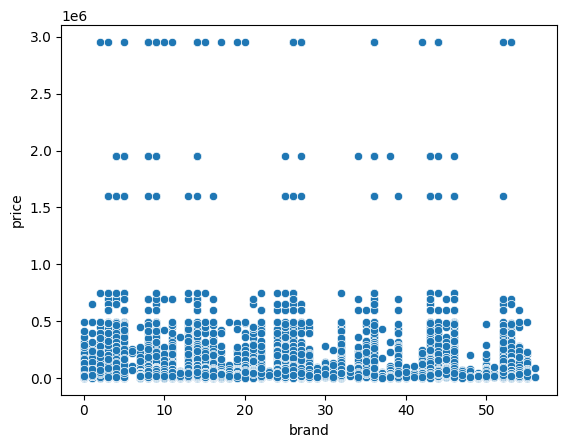

In [39]:
#scatter plot price vs brand
sns.scatterplot(data=train_df, x='brand', y='price')

## ⭕ 'Model' column

*   Lets ordinal encode the 'Model' columns as well
*  (Later) Model and Brand are linked to each other so we will be merging both the columns and doing a ordinal encoding


In [40]:
#2 TRANSFORMATION
train_df['model'] =  ordinalEncoder.fit_transform(train_df[['model']])

In [41]:
train_df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
0,31.0,495.0,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,28.0,930.0,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,9.0,1575.0,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,16.0,758.0,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,36.0,1077.0,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...
188528,8.0,604.0,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,36.0,206.0,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,36.0,223.0,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900


## ⭕ 'Model Year' column


*   Given the columns in years, current year being 2024 we will reduce this column to the difference between current year to the model year. larger the difference older the car is.



In [42]:
#3 TRANSFORMATION
current_year = 2024
train_df['model_year'] = current_year - train_df['model_year']

In [43]:
train_df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
0,31.0,495.0,17,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,28.0,930.0,22,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,9.0,1575.0,22,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,16.0,758.0,7,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,36.0,1077.0,3,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...
188528,8.0,604.0,7,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,36.0,206.0,6,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,36.0,223.0,3,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900


## ⭕ 'fuel_type' column


*   *fuel_type* can be on_hot_encoded as there are only few options


In [44]:
train_df['fuel_type'].value_counts()

,count
fuel_type,
Gasoline,165940
Hybrid,6832
E85 Flex Fuel,5406
Diesel,3955
–,781
Plug-In Hybrid,521
not supported,15




*   7 values are there, and one of them is missing.
*   We will try to extract the values for "-" with engine column.




# ⭕ 'engine' column

*   lot of info present in this column so extract the info and create new columns out of this.



In [26]:
train['engine']

,engine
id,
0,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel
1,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel
2,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...
3,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel
4,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel
...,...
188528,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel
188529,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel
188530,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel


In [27]:
# importing regular expression for extracting this data
import re

In [73]:
#4 TRANSFORMATION

def extract_engine_details(engine_str):
  hp_pattern = r'(\d+(\.\d+)?)HP'
  capacity_patter = r'(\d+(\.\d+)?)L'
  cylinder_pattern = r'(\d+)\sCylinder'

  hp = re.search(hp_pattern, engine_str)
  capacity = re.search(capacity_patter, engine_str)
  cylinder = re.search(cylinder_pattern, engine_str)

  return {
      'hp': float(hp.group(1)) if hp else None,
      'capacity': float(capacity.group(1)) if capacity else None,
      'cylinder': int(cylinder.group(1)) if cylinder else None,
  }

In [95]:
engine_details = train_df['engine'].apply(extract_engine_details)

engine_df = pd.DataFrame(engine_details.tolist())
train_df = pd.concat([train_df, engine_df], axis=1) # checking with temp_df

### Exploring data


1.   Checking Nan and missing values from new columns
2.   trying to fill the missing values of fuel_type column.



In [79]:
filtered_rows = train[train['fuel_type'] == '–']

In [85]:
filtered_rows = filtered_rows[filtered_rows['engine'] != '–']

In [87]:
filtered_rows.size

108



*   We can extract the missing fuel_type values from engine columns. with our transformation #4



In [89]:
#5 TRANSFORMATION
def extract_fuel_from_engine(engine_str):
    # Regex pattern to match fuel types like "Gasoline", "Diesel", etc.
    fuel_type_pattern = r'(Gasoline|Diesel|Hybrid|E85 Flex Fuel|Plug-In Hybrid) Fuel'

    # Search for the fuel type in the engine column
    fuel_type_match = re.search(fuel_type_pattern, engine_str)

    # If a match is found, return the fuel type (first group of the match)
    if fuel_type_match:
        return fuel_type_match.group(1)
    return None

In [96]:
train_df['fuel_type'] = train_df.apply(
    lambda row: extract_fuel_from_engine(row['engine']) if row['fuel_type'] == '–' else row['fuel_type'],
    axis=1
)

In [97]:
train_df['fuel_type'].value_counts()

,count
fuel_type,
Gasoline,165946
Hybrid,6832
E85 Flex Fuel,5406
Diesel,3955
Plug-In Hybrid,521
not supported,15
